1. 

51
100
105
256


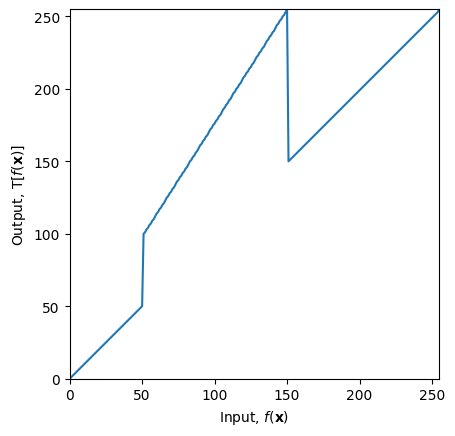

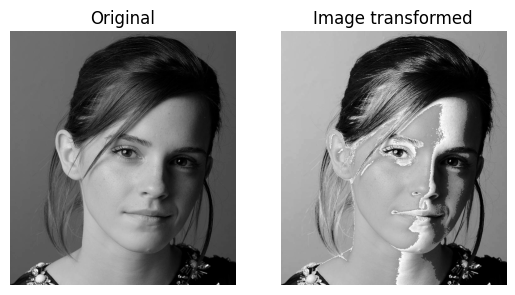

In [10]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50,100),(150,255),(150,150)])#cordinates of the line segments in transformation

t1 = np.linspace(0, c[0,1], c[0,0]+1 -0).astype('uint8')#create array of 51 numbers having values form 0 -50
print(len(t1))
t2 = np.linspace(c[1,1], c[2,1], c[2,0]- c[1,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3,1],255,255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis =0).astype('uint8')
transform = np.concatenate((transform,t3), axis =0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

img_org = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap ='gray')
ax[0].set_title('Original')
ax[0].axis('off')
image_transformed=cv.LUT(img_org, transform)
ax[1].imshow(image_transformed, cmap ='gray')
ax[1].set_title('Image transformed')
ax[1].axis('off')

plt.show()

2. a 

175
36
45
256


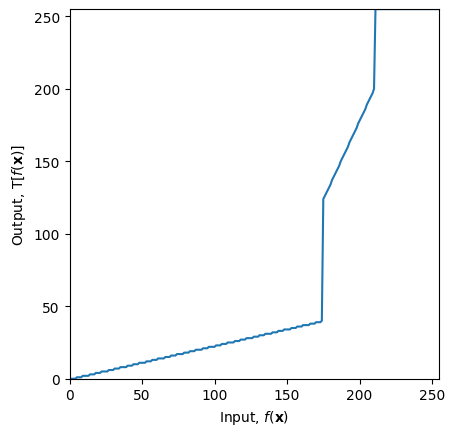

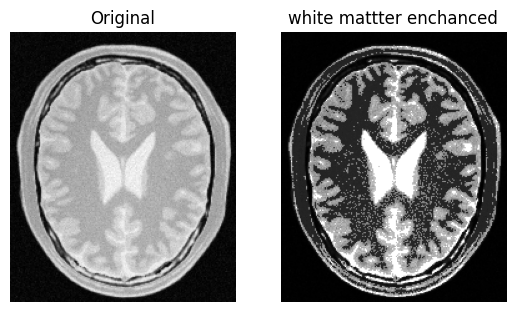

In [6]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(174,40),(174,124),(210,200),(210,255)])#cordinates of the line segments in transformation

t1 = np.linspace(0, c[0,1], c[0,0]+1 -0).astype('uint8')#create array of 51 numbers having values form 0 -50
print(len(t1))
t2 = np.linspace(c[1,1], c[2,1], c[2,0]- c[1,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3,1],255,255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis =0).astype('uint8')
transform = np.concatenate((transform,t3), axis =0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

img_org = cv.imread('BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap ='gray')
ax[0].set_title('Original')
ax[0].axis('off')
image_white=cv.LUT(img_org, transform)
ax[1].imshow(image_white, cmap ='gray')
ax[1].set_title('white mattter enchanced')
ax[1].axis('off')


plt.show()

2. b

121
58
77
256


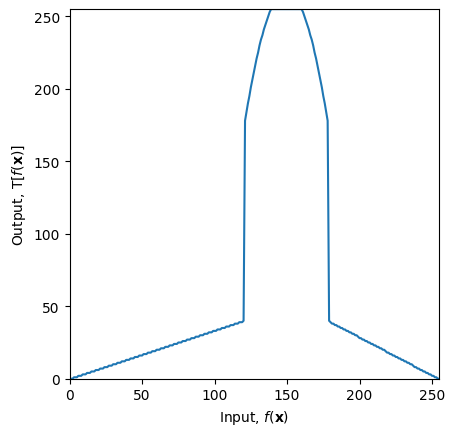

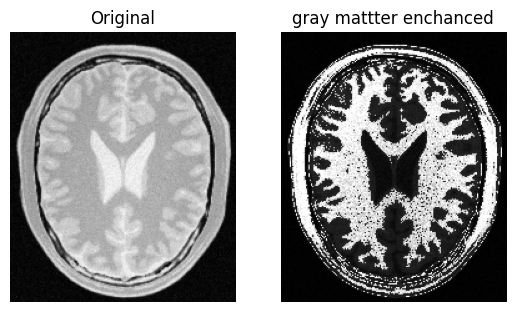

In [7]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(120,40),(120,180),(178,255),(178,0)])#cordinates of the line segments in transformation

t1 = np.linspace(0, c[0,1], c[0,0]+1 -0).astype('uint8')#create array of 51 numbers having values form 0 -50
print(len(t1))

x_values = np.linspace(-1, 1, c[2,0]- c[1,0])
#y_values = min(((174 + 120*(1- x_values**2)),255))
y_values = np.minimum(178 + 90 * (1 - x_values**2), 255)

t2 = y_values.astype('uint8')


#t2 = np.linspace(c[1,1], c[2,1], c[2,0]- c[1,0]).astype('uint8')
print(len(t2))



t3 = np.linspace(40,0,255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis =0).astype('uint8')
transform = np.concatenate((transform,t3), axis =0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

img_org = cv.imread('BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap ='gray')
ax[0].set_title('Original')
ax[0].axis('off')
image_gray=cv.LUT(img_org, transform)
ax[1].imshow(image_gray, cmap ='gray')
ax[1].set_title('gray mattter enchanced')
ax[1].axis('off')

plt.show()

3. 

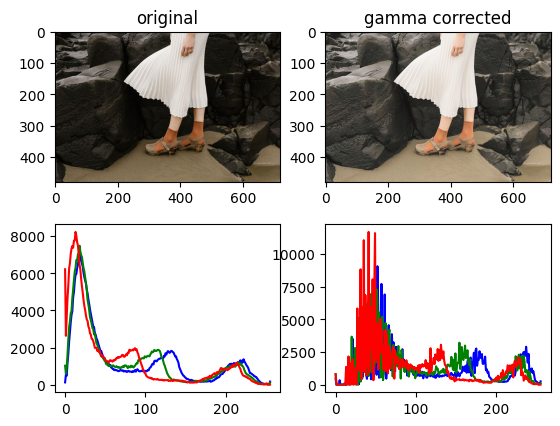

In [46]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)

#gamma corection
gamma = 0.56
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_process = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
L, a, b = cv.split(img_process)
L_Correct = cv.LUT(L,table)
img_gamma = cv.merge((L_Correct, a, b))
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
fig, axarr = plt.subplots(2,2)
axarr[0,0].imshow(img_orig)
axarr[0,0].set_title('original')
axarr[0,1].imshow(img_gamma)
axarr[0,1].set_title('gamma corrected')
#Histograms
color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig] , [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma] , [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)
plt.show()
#Highgui show
img_orig = cv.cvtColor(img_orig, cv.COLOR_RGB2BGR)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_RGB2BGR)
cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.imshow('Image', img_orig)
cv.waitKey(0)
cv.imshow('image', img_gamma)
cv.waitKey(0)
cv.destroyAllWindows()

4.